In [1]:
# Import necessary libraries:-
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load datasets:-
train_data = pd.read_csv('C:\\Users\\ADMINI\\Desktop\\train.csv')
test_data = pd.read_csv('C:\\Users\\ADMINI\\Desktop\\test.csv')
gender_submission = pd.read_csv('C:\\Users\\ADMINI\\Desktop\\gender_submission.csv')

In [4]:
# Identifying missing values
print("Missing values in the train dataset:")
print(train_data.isnull().sum())

# Print missing values in the test dataset
print("\nMissing values in the test dataset:")
print(test_data.isnull().sum())

# Print missing values in the gender submission dataset
print("\nMissing values in the gender submission dataset:")
print(gender_submission.isnull().sum())

Missing values in the train dataset:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values in the test dataset:
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Missing values in the gender submission dataset:
PassengerId    0
Survived       0
dtype: int64


In [5]:
# Remove rows with missing values
train_data_cleaned = train_data.dropna()
test_data_cleaned = test_data.dropna()
gender_submission_cleaned = gender_submission.dropna()

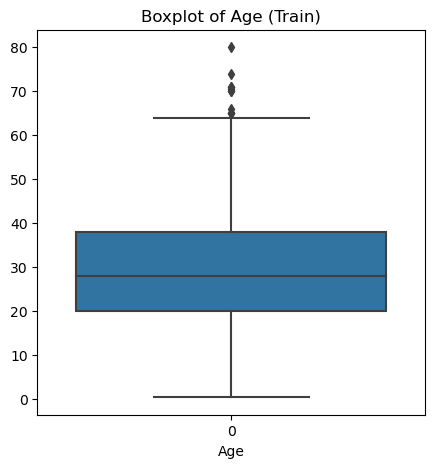

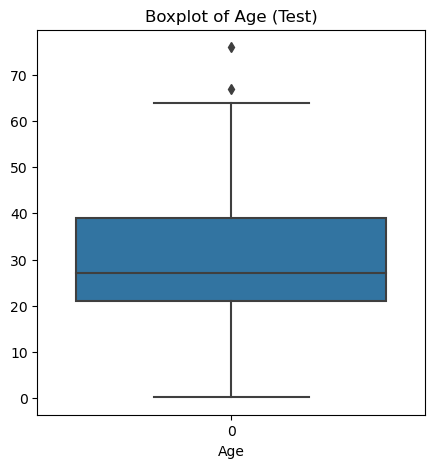

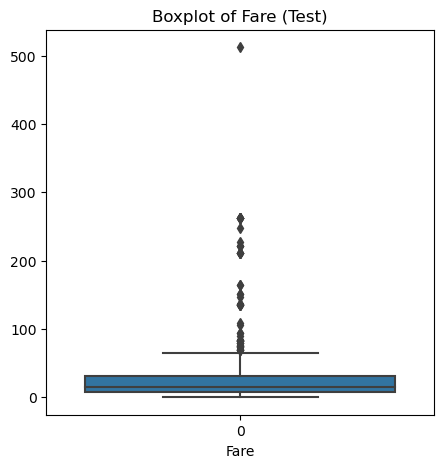

In [7]:
# Train dataset
# Boxplot for Age in the train dataset
plt.figure(figsize=(5, 5))
sns.boxplot(data=train_data['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age (Train)')
plt.show()

# Test dataset

# Boxplot for Age in the test dataset
plt.figure(figsize=(5, 5))
sns.boxplot(data=test_data['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Age (Test)')
plt.show()

# Boxplot for Fare in the test dataset
plt.figure(figsize=(5, 5))
sns.boxplot(data=test_data['Fare'])
plt.xlabel('Fare')
plt.title('Boxplot of Fare (Test)')
plt.show()

In [8]:
# Handle outliers for train dataset
age_iqr_train = train_data['Age'].quantile(0.75) - train_data['Age'].quantile(0.25)
age_lower_train = train_data['Age'].quantile(0.25) - 1.5 * age_iqr_train
age_upper_train = train_data['Age'].quantile(0.75) + 1.5 * age_iqr_train
train_data = train_data[(train_data['Age'] >= age_lower_train) & (train_data['Age'] <= age_upper_train)]

# Handle outliers for test dataset (Age)
age_iqr_test = test_data['Age'].quantile(0.75) - test_data['Age'].quantile(0.25)
age_lower_test = test_data['Age'].quantile(0.25) - 1.5 * age_iqr_test
age_upper_test = test_data['Age'].quantile(0.75) + 1.5 * age_iqr_test
test_data = test_data[(test_data['Age'] >= age_lower_test) & (test_data['Age'] <= age_upper_test)]

# Handle outliers for test dataset (Fare)
fare_iqr_test = test_data['Fare'].quantile(0.75) - test_data['Fare'].quantile(0.25)
fare_lower_test = test_data['Fare'].quantile(0.25) - 1.5 * fare_iqr_test
fare_upper_test = test_data['Fare'].quantile(0.75) + 1.5 * fare_iqr_test
test_data = test_data[(test_data['Fare'] >= fare_lower_test) & (test_data['Fare'] <= fare_upper_test)]

In [9]:
# Verify the cleaned train dataset
print("\nCleaned train dataset information:")
print(train_data.info())

# Verify the cleaned test dataset
print("\nCleaned test dataset information:")
print(test_data.info())


Cleaned train dataset information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 703 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  703 non-null    int64  
 1   Survived     703 non-null    int64  
 2   Pclass       703 non-null    int64  
 3   Name         703 non-null    object 
 4   Sex          703 non-null    object 
 5   Age          703 non-null    float64
 6   SibSp        703 non-null    int64  
 7   Parch        703 non-null    int64  
 8   Ticket       703 non-null    object 
 9   Fare         703 non-null    float64
 10  Cabin        180 non-null    object 
 11  Embarked     701 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 71.4+ KB
None

Cleaned test dataset information:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 296 entries, 0 to 415
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       ---